In [4]:
import numpy as np

In [5]:
test_latent_dir = '/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/models/modelv1/latent_v1/test_374_latent_space.npy'

In [6]:
latent = np.load(test_latent_dir, allow_pickle=True)

In [7]:
import pandas as pd

encoded_samples = []

for idx in range(latent.shape[0]):
    vector = np.reshape(latent[idx][0], (-1, 1))
    encoded_sample = {f"Enc. Variable {i}": enc for i, enc in enumerate(vector)}
    encoded_sample['label'] = latent[idx][1].cpu().numpy()[0]
    encoded_samples.append(encoded_sample)

encoded_samples = pd.DataFrame(encoded_samples)

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(encoded_samples.drop(['label'],axis=1))
fig = px.scatter(tsne_results, x=0, y=1,
                 color=encoded_samples.label.astype(str),
                 labels={'0': 'tsne-2d-one', '1': 'tsne-2d-two'})
fig.show()

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [9]:
encoded_samples = []
labels = []

for idx in range(latent.shape[0]):
    encoded_samples.append(latent[idx][0])
    labels.append(latent[idx][1])

encoded_samples = np.array(encoded_samples)
labels = np.array(labels)

/tmp/ipykernel_139255/4228502673.py:9: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  labels = np.array(labels)
/tmp/ipykernel_139255/4228502673.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.array(labels)


In [10]:
encoded_samples.shape, labels.shape

((16153, 1000), (16153,))

In [11]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(encoded_samples)

In [12]:
def metric_calculation(true_positive, true_negative, false_positive, false_negative):
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * precision * recall / (precision + recall)
    return accuracy, precision, recall, f1_score

In [25]:
class_first_true = 0
class_first_false = 0

class_second_true = 0
class_second_false = 0 

predictions = kmeans.predict(encoded_samples)

# Needed if prediction labels are reversed
labels = np.abs(labels - 1)

for idx, prediction in enumerate(predictions):
    if prediction == 0 and prediction == labels[idx]:
        class_first_true += 1
    elif prediction == 0 and prediction != labels[idx]:
        class_first_false += 1
    elif prediction == 1 and prediction == labels[idx]:
        class_second_true += 1
    else:
        class_second_false += 1

accuracy, precision, recall, f1_score = metric_calculation(class_first_true, class_second_true, class_first_false, class_second_false)

<AxesSubplot: >

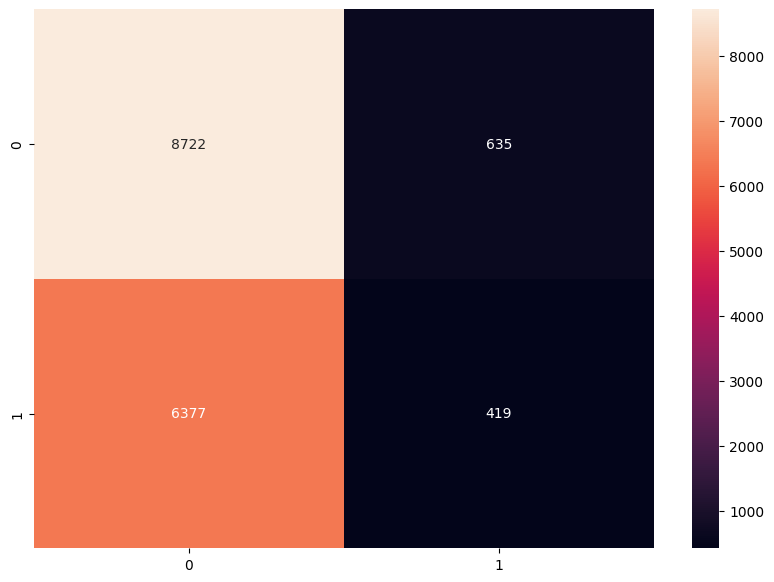

In [28]:
confussion = [[class_first_true, class_first_false], [class_second_false, class_second_true]]

df_cm = pd.DataFrame(confussion)

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')

In [26]:
f'accuracy: {accuracy}, precision: {precision}, recall: {recall}, f1_score: {f1_score}'

'accuracy: 0.5659010710084814, precision: 0.9321363684941755, recall: 0.5776541492814093, f1_score: 0.7132809944389925'